In [4]:
import numpy as np
import matplotlib.pyplot as plt

import causality
import stats

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
sys.path.append("..")

In [5]:
import synth_gen
import stats

In [6]:
nb_samples = 10000

Nx = {
    'name': 'exp',
    'var': 5
}

Ny = {
    'name': 'normal',
    'var': 4
}


f = lambda x: 10*np.tanh(x) + 4*np.sin(x)+ x + x ** 2 + .1 *x**3

In [7]:
binary_am = synth_gen.BinaryAM(Nx, Ny, f, nb_samples)

In [8]:
x = binary_am.x
y = binary_am.y

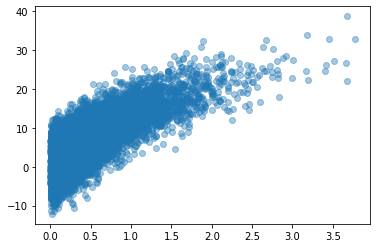

In [7]:
viz.pretty_scatter(x, y)

In [8]:
n_clusters=8
X_, Y_, _ = intest.partition_data(x, y, n_clusters)

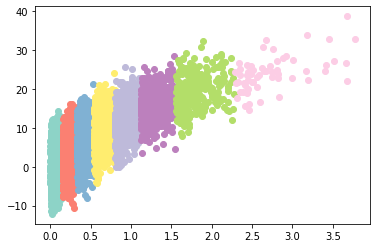

In [9]:
intest.plot_scatters(X_, Y_)

In [10]:
residuals, X_, Y_, models = intest.compute_idential_test(x, y, n_clusters=n_clusters)
score, pairs = intest.find_max_discrp(residuals, bins=30)

In [11]:
score

0.6285931737017735

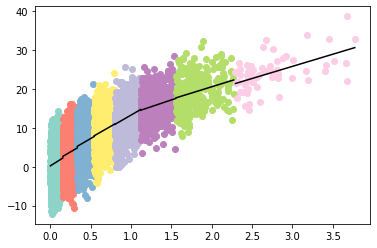

In [12]:
intest.plot_models(X_, Y_, models)

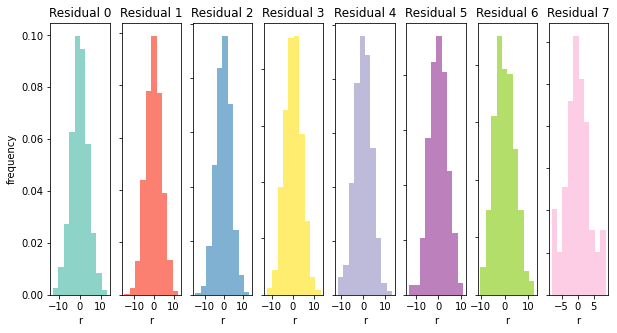

In [13]:
intest.plot_residuals(residuals)

In [14]:
X_r, Y_r, _ = intest.partition_data(y, x, n_clusters=n_clusters)

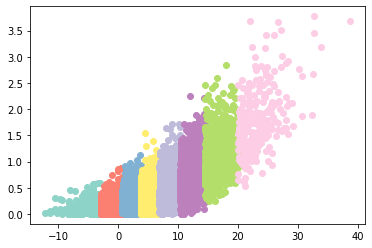

In [15]:
intest.plot_scatters(X_r, Y_r)

In [16]:
residualsr, Y_r, X_r, modelsr = intest.compute_idential_test(y, x, n_clusters)
scorer, pairsr = intest.find_max_discrp(residualsr, bins=30)

In [17]:
scorer

1.082825976661593

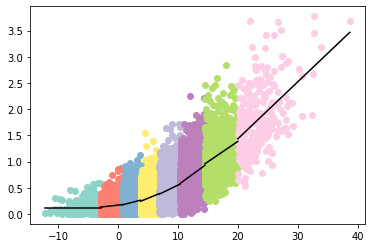

In [18]:
intest.plot_models(Y_r, X_r, modelsr)

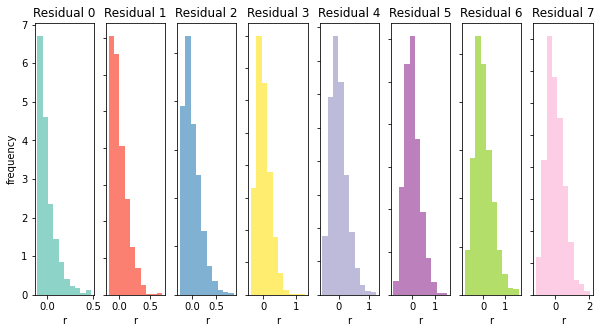

In [19]:
intest.plot_residuals(residualsr)

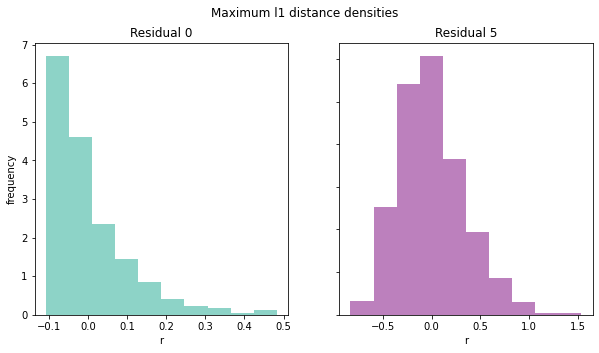

In [20]:
intest.plot_residuals(residualsr, res_filter=pairsr, title='Maximum l1 distance densities')

In [21]:
print('X -> Y', score)

X -> Y 0.6285931737017735


In [22]:
print('X <- Y', scorer)

X <- Y 1.082825976661593


In [ ]:
# avg dist to avg
# can use models to easily compute an estimate cheaply (add point and degree-> regress)
# var / moment est for low sample regime

# discretise based on largest support (min, max) , see hist param